<a href="https://colab.research.google.com/github/wareissoft/2024_VAI/blob/main/%EC%8B%9C%EA%B0%81%EC%A7%80%EB%8A%A5_%ED%8C%80%ED%94%8C_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 설치 및 데이터 준비**

In [3]:
# Google Colab에서는 다음과 같은 라이브러리 설치가 필요할 수 있습니다.
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

# 데이터셋을 로드하는 경로를 지정하세요.
# 예를 들어, "data/car_images" 폴더에 각 차종별 폴더가 있다고 가정합니다.
data_dir = '/content/drive/MyDrive/datasets/Training'

# **2. 데이터 전처리**

In [4]:
# ImageDataGenerator를 사용하여 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  # 80% 학습, 20% 검증
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

img_size = 224
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4871 images belonging to 16 classes.
Found 1212 images belonging to 16 classes.


# **3. Dense Net 모델 생성**

In [7]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# 특정 레이어까지만 고정
for layer in base_model.layers[:300]:
    layer.trainable = False

# 분류기를 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # 변경된 레이어 크기
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# 최종 모델
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **4. 모델 학습**

In [8]:
# 모델 학습
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/10
153/153 [==============================] - 1658s 11s/step - loss: 0.5657 - accuracy: 0.8269 - val_loss: 0.6336 - val_accuracy: 0.8127 - lr: 0.0010
Epoch 2/10
153/153 [==============================] - 1584s 10s/step - loss: 0.1012 - accuracy: 0.9667 - val_loss: 0.5660 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 3/10
153/153 [==============================] - 1643s 11s/step - loss: 0.0774 - accuracy: 0.9764 - val_loss: 1.1966 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 4/10
153/153 [==============================] - 1635s 11s/step - loss: 0.0856 - accuracy: 0.9741 - val_loss: 0.3949 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 5/10
153/153 [==============================] - 1639s 11s/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.2911 - val_accuracy: 0.9257 - lr: 0.0010
Epoch 6/10
153/153 [==============================] - 1575s 10s/step - loss: 0.0467 - accuracy: 0.9860 - val_loss: 0.2591 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 7/10
153/153 [==============================] 

# **5. 모델 평가 및 시각화**

38/38 [==============================] - 288s 8s/step - loss: 0.3134 - accuracy: 0.9224
Validation Accuracy: 92.24%


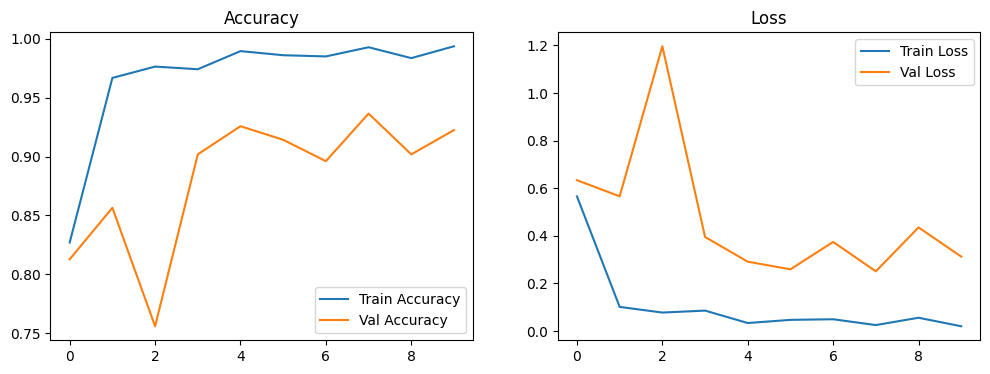

In [9]:
# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

# **6. 모델 저장**

In [10]:
# 모델 저장
model.save('/content/drive/MyDrive/model/team/test_model_1')